In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
import utils
import pandas as pd
utils.set_pretty_prints()

In [2]:
DATA_FOLDER = '../data'
DATA_FILE = 'restocracy_all_data.pkl'

In [3]:
with open(os.path.join(DATA_FOLDER, DATA_FILE), 'rb') as fh:
    data = pickle.load(fh)

In [4]:
data[0]

{'price': '202 lei',
 'review': ' \n Noul restaurant vedeta al Bucurestiului, o constructie geniala de marketing \n Maize s-a deschis la inceputul lui noiembrie 2017 in mansarda unui (fel de) bloc cu doua etaje de pe eleganta strada Paris, aproape de Piata Dorobantilor. Poti sa o iei, la fel de bine, si ca pe o casa veche din Bucurestiul vechi, facuta fara imaginatie, sau cu economie la arhitect. Casa e renovata recent, iar zona e atat de frumoasa si de aristocratica, incat orice casa de acolo nu poate sa fie decat frumoasa si ea, indiferent cum ar arata si in ce stare ar fi. \n Daca cei care au construit batrana casa nu au adus arhitecti cu imaginatie, cei care au transformat mansarda in restaurantul Maize au facut-o. Totul arata foarte bine acolo, au pus in valoare fiecare coltisor si detaliu, au reusit sa o umple si de lumina, si au facut loc si bucatariei chiar in mijloc, cu plite si gratare cu tot, dupa cum se vede si in poze, care ma scutesc de mai mult scris. Acolo, sus, au si o

In [5]:
len(data)

200

In [6]:
prices = [x['price'] for x in data]
reviews = [x['review'] for x in data]

In [7]:
prices[:5]

['202 lei', '176 lei', '187 lei', '264 lei', '187 lei']

In [8]:
reviews[0]

' \n Noul restaurant vedeta al Bucurestiului, o constructie geniala de marketing \n Maize s-a deschis la inceputul lui noiembrie 2017 in mansarda unui (fel de) bloc cu doua etaje de pe eleganta strada Paris, aproape de Piata Dorobantilor. Poti sa o iei, la fel de bine, si ca pe o casa veche din Bucurestiul vechi, facuta fara imaginatie, sau cu economie la arhitect. Casa e renovata recent, iar zona e atat de frumoasa si de aristocratica, incat orice casa de acolo nu poate sa fie decat frumoasa si ea, indiferent cum ar arata si in ce stare ar fi. \n Daca cei care au construit batrana casa nu au adus arhitecti cu imaginatie, cei care au transformat mansarda in restaurantul Maize au facut-o. Totul arata foarte bine acolo, au pus in valoare fiecare coltisor si detaliu, au reusit sa o umple si de lumina, si au facut loc si bucatariei chiar in mijloc, cu plite si gratare cu tot, dupa cum se vede si in poze, care ma scutesc de mai mult scris. Acolo, sus, au si o mica terasa pe acoperis, foarte

In [9]:
reviews[0].split()[:10]

['Noul',
 'restaurant',
 'vedeta',
 'al',
 'Bucurestiului,',
 'o',
 'constructie',
 'geniala',
 'de',
 'marketing']

In [10]:
def get_vocab(lst_docs):
    dct_occ = {}
    for doc in lst_docs:
        words = doc.split()
        for word in words:
            if word in dct_occ:
                dct_occ[word] += 1
            else:
                dct_occ[word] = 1
    occs = [(w, a) for w,a in dct_occ.items()]
    occs = sorted(occs, key=lambda x: x[1], reverse=True)
    dct_w2i = {w[0]:i+1 for i,w in enumerate(occs)}
    dct_w2i['UNK'] = 0
    dct_i2w = {i:w for w,i in dct_w2i.items()}
    return occs, dct_w2i, dct_i2w

In [11]:
oc, w2i, i2w = get_vocab(reviews)
oc[:10]

[('de', 7642),
 ('si', 6195),
 ('in', 3904),
 ('la', 3650),
 ('cu', 3275),
 ('mai', 3019),
 ('ca', 2698),
 ('sa', 2655),
 ('din', 2230),
 ('care', 2147)]

In [12]:
w2i['Noul']

2181

In [13]:
i2w[100]

'bune'

In [14]:
w2i.get('bunicel',0)

0

In [15]:
len(w2i)

22000

In [16]:
def doc_to_tokens(doc, dct_w2i, unk=0):
    tokens = []
    for word in doc.split():
        tokens.append(dct_w2i.get(word, unk))
    return tokens

def tokens_to_doc(tokens, dct_i2w):
    words = []
    for token in tokens:
        words.append(dct_i2w[token])
    return " ".join(words)

In [17]:
t1 = doc_to_tokens(
    doc="ana are foarte multe mere frumusele si putin viermanoase", 
    dct_w2i=w2i
)
t1

[0, 59, 22, 46, 9960, 0, 2, 97, 0]

In [18]:
tokens_to_doc(t1, i2w)

'UNK are foarte multe mere UNK si putin UNK'

(array([72., 83., 19.,  8.,  8.,  1.,  3.,  1.,  3.,  2.]),
 array([  255. ,  3259.2,  6263.4,  9267.6, 12271.8, 15276. , 18280.2, 21284.4, 24288.6, 27292.8, 30297. ]),
 <a list of 10 Patch objects>)

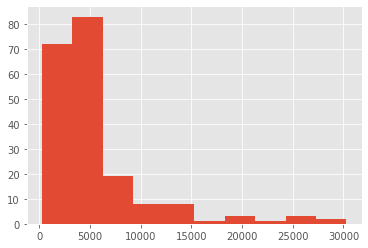

In [19]:
review_lens = [len(r) for r in reviews]
plt.hist(review_lens)

In [20]:
# but we need words
all_data = [doc_to_tokens(doc, dct_w2i=w2i) for doc in reviews]
tokens_to_doc(all_data[10][:10], i2w)

'Ei bine, nu stiu sa raspund la intrebarea asta… E'

In [21]:
reviews[10][:100]

' \n Ei bine, nu stiu sa raspund la intrebarea asta… \n E greu de crezut ca sunt atat de multe restaura'

(array([12., 52., 68., 24., 10., 10.,  4.,  2.,  3.,  5.,  1.,  0.,  1.,  2.,  0.,  2.,  2.,  0.,  0.,  2.]),
 array([  34. ,  290.5,  547. ,  803.5, 1060. , 1316.5, 1573. , 1829.5, 2086. , 2342.5, 2599. , 2855.5, 3112. , 3368.5, 3625. , 3881.5, 4138. , 4394.5, 4651. , 4907.5, 5164. ]),
 <a list of 20 Patch objects>)

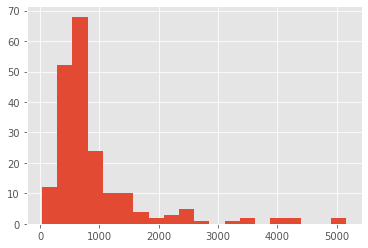

In [22]:
reviews_token_lens = [len(r) for r in all_data]
plt.hist(reviews_token_lens, bins=20)

In [23]:
all_data_fix = [r[:500] for r in all_data]
print(len(all_data_fix[123]))
print(all_data_fix[0])

500
[2181, 26, 2751, 37, 244, 15, 1377, 4219, 1, 2420, 3573, 86, 127, 4, 1644, 78, 1160, 886, 3, 4220, 160, 10654, 10655, 635, 5, 106, 5192, 1, 11, 3076, 314, 3077, 128, 1, 125, 1781, 1290, 8, 15, 10656, 4, 69, 1, 173, 2, 7, 11, 15, 188, 1782, 9, 528, 636, 502, 82, 5193, 27, 5, 3574, 4, 5194, 141, 16, 2421, 5195, 122, 239, 16, 129, 1, 529, 2, 1, 4221, 637, 251, 188, 1, 98, 13, 88, 8, 79, 89, 529, 2, 598, 1979, 40, 63, 199, 2, 3, 19, 1980, 63, 6805, 143, 58, 10, 21, 745, 3078, 188, 13, 21, 489, 2752, 5, 5193, 58, 10, 21, 4222, 4220, 3, 90, 3573, 21, 5196, 1538, 199, 22, 36, 137, 21, 174, 3, 2422, 138, 6806, 2, 6807, 21, 412, 8, 15, 1783, 2, 1, 10657, 2, 21, 109, 196, 2, 848, 47, 3, 1233, 5, 10658, 2, 6808, 5, 990, 49, 40, 20, 283, 2, 3, 1161, 10, 118, 10659, 1, 6, 29, 3575, 2423, 717, 21, 2, 15, 430, 136, 11, 3079, 22, 529, 2, 598, 545, 2, 13, 112, 45, 14, 179, 42, 41, 2, 1454, 9, 10660, 148, 5, 582, 474, 3, 1162, 12, 275, 991, 66, 63, 259, 114, 98, 15, 136, 1, 992, 14, 2182, 1981, 16, 

In [24]:
len(reviews[123].split())

838

In [25]:
def token_docs_to_array(tokenized_documents, maxwords=500):
    lst_docs = []
    for token_doc in tokenized_documents:
        if len(token_doc) > maxwords:
            token_doc = token_doc[:maxwords]
        else:
            token_doc = token_doc + (maxwords - len(token_doc)) * [0]
        lst_docs.append(token_doc)
    return np.array(lst_docs)

np_data = token_docs_to_array(all_data)
np_data.shape

(200, 500)

In [26]:
np.argmin([len(x) for x in all_data])

165

In [27]:
all_data[165]

[10512,
 25,
 12,
 26,
 5,
 216,
 508,
 2,
 1882,
 5743,
 3,
 1185,
 20239,
 6783,
 10513,
 20240,
 9,
 3963,
 1185,
 2929,
 6783,
 10513,
 9,
 4895,
 5,
 61,
 10512,
 2,
 20241,
 1280,
 6783,
 611,
 2,
 1345]

In [28]:
reviews[165]

' \n Zigolini este un restaurant cu specific italian si international, localizat in Complexul Comercial Jolie Ville Galleria din Baneasa. \n Complexul comercial Jolie Ville din Voluntari, cu restaurantele Zigolini si Mandarin, cafeneaua Jolie Cafe si altele…'

In [29]:
np_data[165]

array([10512,    25,    12,    26,     5,   216,   508,     2,  1882,  5743,     3,  1185, 20239,  6783, 10513, 20240,     9,  3963,  1185,  2929,  6783, 10513,     9,  4895,     5,    61, 10512,     2, 20241,  1280,  6783,   611,     2,  1345,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [30]:
y = np.array([int(x.split()[0]) for x in prices])
y[165]

150

In [31]:
from sklearn.model_selection import train_test_split

#x_train, x_dev, y_train, y_dev = train_test_split(np_data, y, random_state=103, test_size=0.15)
# not above split as we have to replicate previous dataset so we can compare results
x_train, x_dev, y_train, y_dev = train_test_split(np_data, y, test_size=0.10, random_state=1010)

In [32]:
print(x_train.shape)
print(x_dev.shape)


(180, 500)
(20, 500)


In [33]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [50]:
EPOCHS = 50

## Now we select the data we want to "debug"

In [118]:
WORDS =['pizza','italienesc','italieneasca']
for w in WORDS:
    print(w2i[w])

1106
2238
1239


## Finally we define the simple neural model

In [119]:
# some helper function to "explain" the modelled latent spaces

def explain_embed_layer(embed_layer, dct_index2label, start_end=None, highlight_words=[]):
    
    if start_end is None:        
        dlen = len(dct_index2label)
        chosen_idxs = list(range(dlen // 4, dlen // 2))[:1000]
    else:
        chosen_idxs = list(range(start_end[0]-1, start_end[1]+1))
        
    ll = len(chosen_idxs)
    lbls = [dct_index2label[ii] for ii in chosen_idxs]    
    np_emb = embed_layer.get_weights()[0]
    np_se = np_emb[chosen_idxs]
    
    from sklearn.manifold import TSNE

    tsne = TSNE(n_components=2)
    tsne.fit(np_se)
    np_xy = tsne.embedding_
    plt.figure(figsize=(34,21))
    plt.scatter(np_xy[:,0], np_xy[:,1], s=1)
    for i, pt in enumerate(np_xy):
        w = lbls[i]    
        if w.lower() in highlight_words:
            print("Found {} at {}".format(w, pt))
            plt.annotate(w,xy=(pt[0], pt[1]), c='red')
        else:
            plt.annotate(w,xy=(pt[0], pt[1]), c='black')
    plt.show()    
    return lbls


In [120]:
tf_inp = tf.keras.layers.Input((500,), name='doc_input')
print("'Categorical' data input", tf_inp)
embedding_projection = tf.keras.layers.Embedding(len(w2i), 100, name='word_embeds')
print(embedding_projection)
tf_x = embedding_projection(tf_inp)
print(tf_x)
print(embedding_projection.get_weights()[0].shape)

'Categorical' data input Tensor("doc_input_10:0", shape=(None, 500), dtype=float32)
Tensor("word_embeds_10/Identity:0", shape=(None, 500, 100), dtype=float32)
(22000, 100)


In [121]:
from_2d_to_1d_layer = tf.keras.layers.Flatten(name='flatten_doc_vectors')

tf_x = from_2d_to_1d_layer(tf_x)
print(tf_x)

Tensor("flatten_doc_vectors_9/Identity:0", shape=(None, 50000), dtype=float32)


In [122]:
# add some regularization
tf_x = tf.keras.layers.Dropout(0.5, name='hide_the_features')(tf_x)

In [123]:
tf_out = tf.keras.layers.Dense(1)(tf_x)
print(tf_out)

Tensor("dense_9/Identity:0", shape=(None, 1), dtype=float32)


In [124]:
model = tf.keras.models.Model(tf_inp, tf_out, name='naive_model')
#
# we opt for MAE in order to have a better "view" of the actual difference between targets and predictions
#
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "naive_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
doc_input (InputLayer)       [(None, 500)]             0         
_________________________________________________________________
word_embeds (Embedding)      (None, 500, 100)          2200000   
_________________________________________________________________
flatten_doc_vectors (Flatten (None, 50000)             0         
_________________________________________________________________
hide_the_features (Dropout)  (None, 50000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 50001     
Total params: 2,250,001
Trainable params: 2,250,001
Non-trainable params: 0
_________________________________________________________________


Found pizza at [  0.36 -15.71]
Found italieneasca at [ 14.1  -17.61]
Found italienesc at [24.22 -8.22]


C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56898 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 128578 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56897 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 128577 missing from current font.
  font.load_char(ord(s), flags=flags)


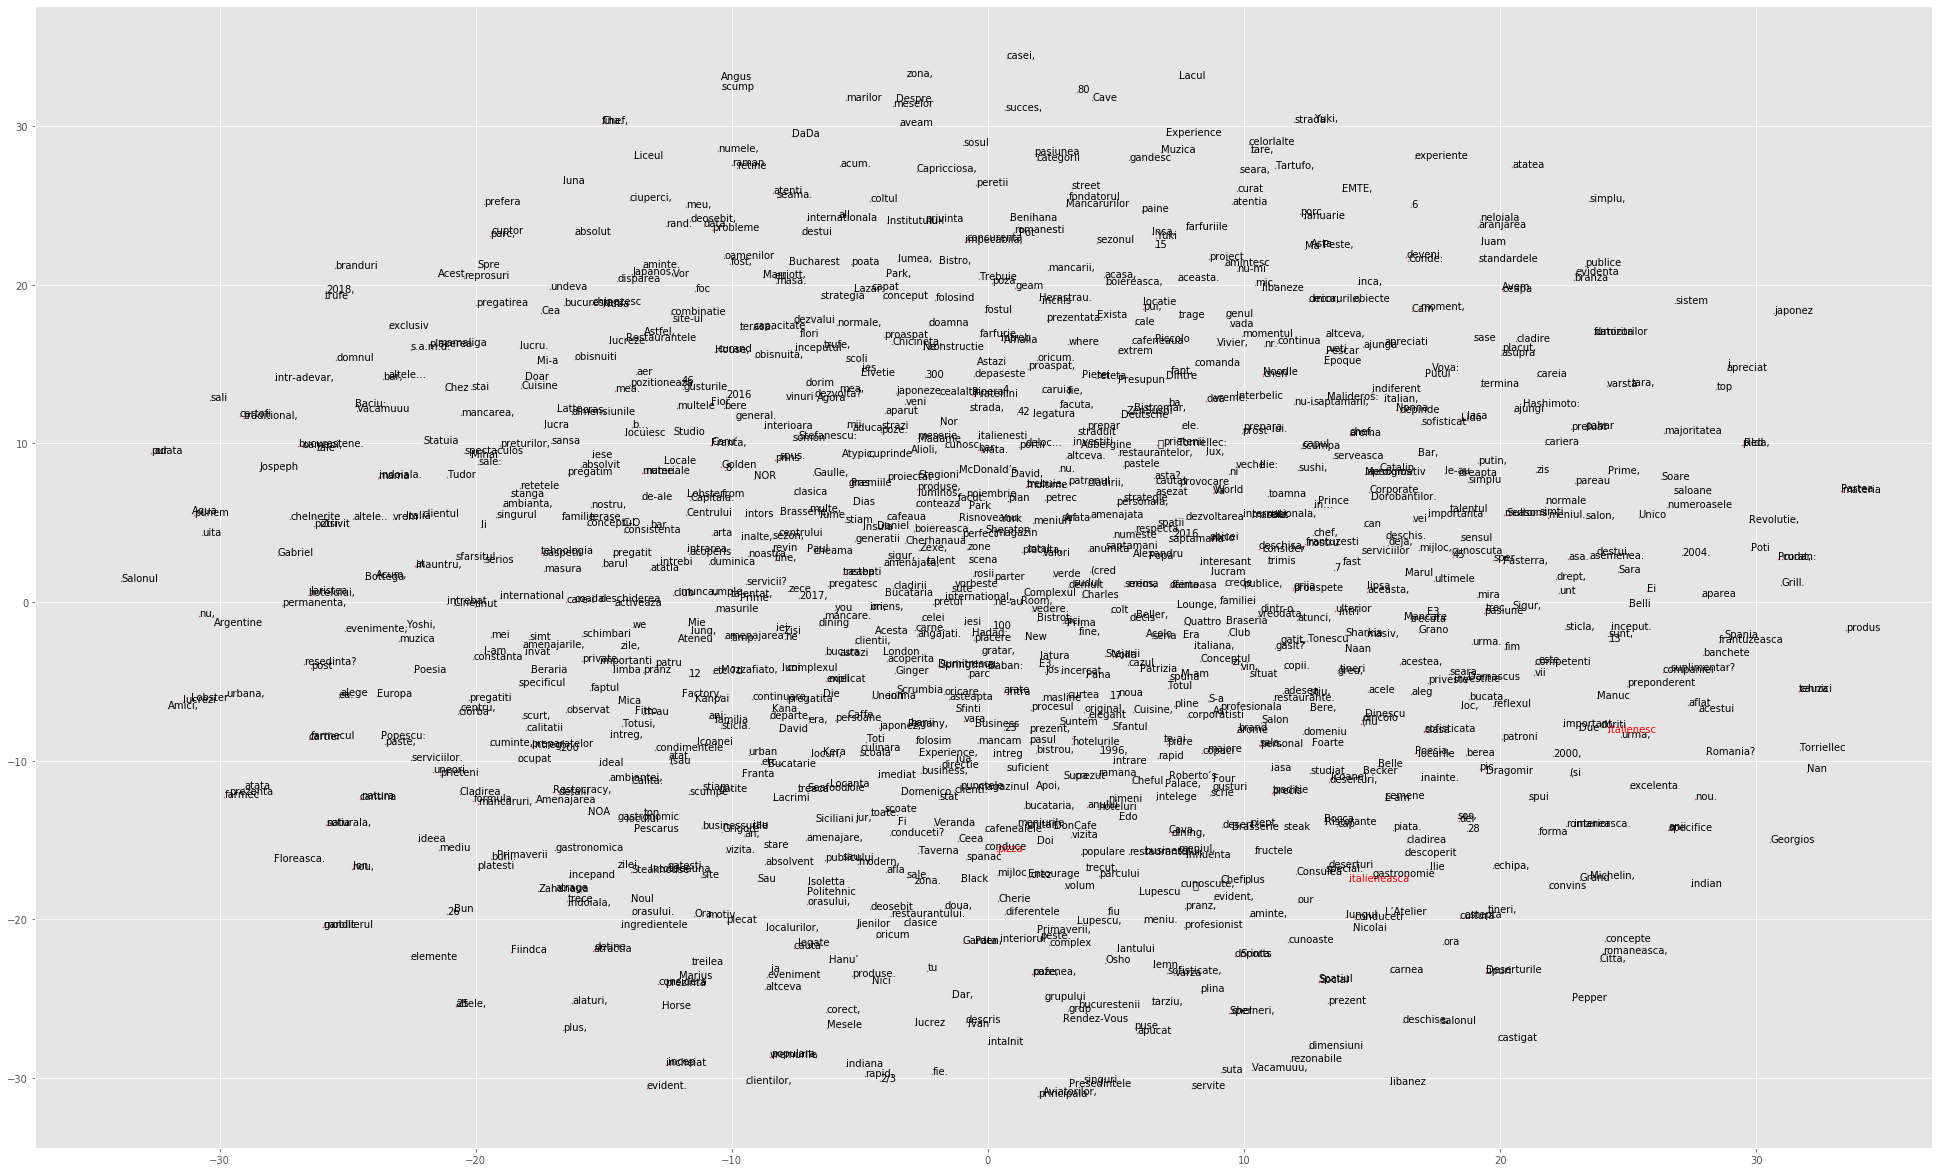

In [126]:
lbls = explain_embed_layer(
    embed_layer=embedding_projection,
    dct_index2label=i2w,
    start_end=(1100,2300),
    highlight_words=['pizza','italienesc','italieneasca']
)


In [127]:
'pizza' in lbls

True

In [128]:
hist = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_dev, y_dev),
    epochs=EPOCHS
)

Train on 180 samples, validate on 20 samples
Epoch 1/50
180/180 [==============================] - 1s 3ms/sample - loss: 144.4405 - val_loss: 141.2197
Epoch 2/50
180/180 [==============================] - 0s 765us/sample - loss: 143.4411 - val_loss: 139.9217
Epoch 3/50
180/180 [==============================] - 0s 881us/sample - loss: 141.6424 - val_loss: 137.2589
Epoch 4/50
180/180 [==============================] - 0s 806us/sample - loss: 138.1953 - val_loss: 132.5250
Epoch 5/50
180/180 [==============================] - 0s 770us/sample - loss: 132.2308 - val_loss: 124.6679
Epoch 6/50
180/180 [==============================] - 0s 761us/sample - loss: 122.7362 - val_loss: 112.6668
Epoch 7/50
180/180 [==============================] - 0s 748us/sample - loss: 108.5621 - val_loss: 95.6741
Epoch 8/50
180/180 [==============================] - 0s 759us/sample - loss: 88.8942 - val_loss: 72.8635
Epoch 9/50
180/180 [==============================] - 0s 814us/sample - loss: 64.5808 - val_loss

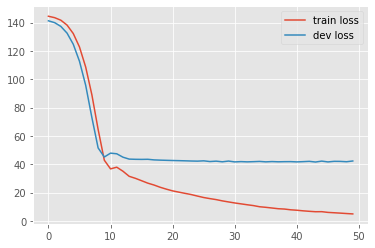

In [129]:
htrn = hist.history['loss']
hdev = hist.history['val_loss']
n_ep = len(htrn)
plt.figure()
plt.plot(np.arange(n_ep), htrn, label='train loss')
plt.plot(np.arange(n_ep), hdev, label='dev loss')
plt.legend()
plt.show()

In [130]:
y_pred = model.predict(x_dev)

In [131]:
print(y_dev.shape)
print(y_pred.shape)

(20,)
(20, 1)


In [132]:

df_res = pd.DataFrame(
    dict(
        Reality=y_dev,
        Predictions=y_pred.ravel()
    )
)
df_res

,Reality,Predictions
0,77,131.5499
1,104,123.9204
2,259,140.1592
3,82,115.8297
4,106,131.1057
5,208,155.8414
6,117,135.9081
7,82,124.6419
8,189,145.0860
9,130,145.2666


## Plan for experiment #6:
 - analyze embeddings
 - min-max target -> Train & evaluate
 - analyze embeddings
 - average embeds -> Train & evaluate
 - ...analyze embeddings
 - process sequence -> Train & evaluate
 - .....analyze embeddings

Found pizza at [ 4.74 -6.64]
Found italieneasca at [  7.77 -20.35]
Found italienesc at [  4.04 -22.92]


C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56898 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 128578 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56897 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 128577 missing from current font.
  font.load_char(ord(s), flags=flags)


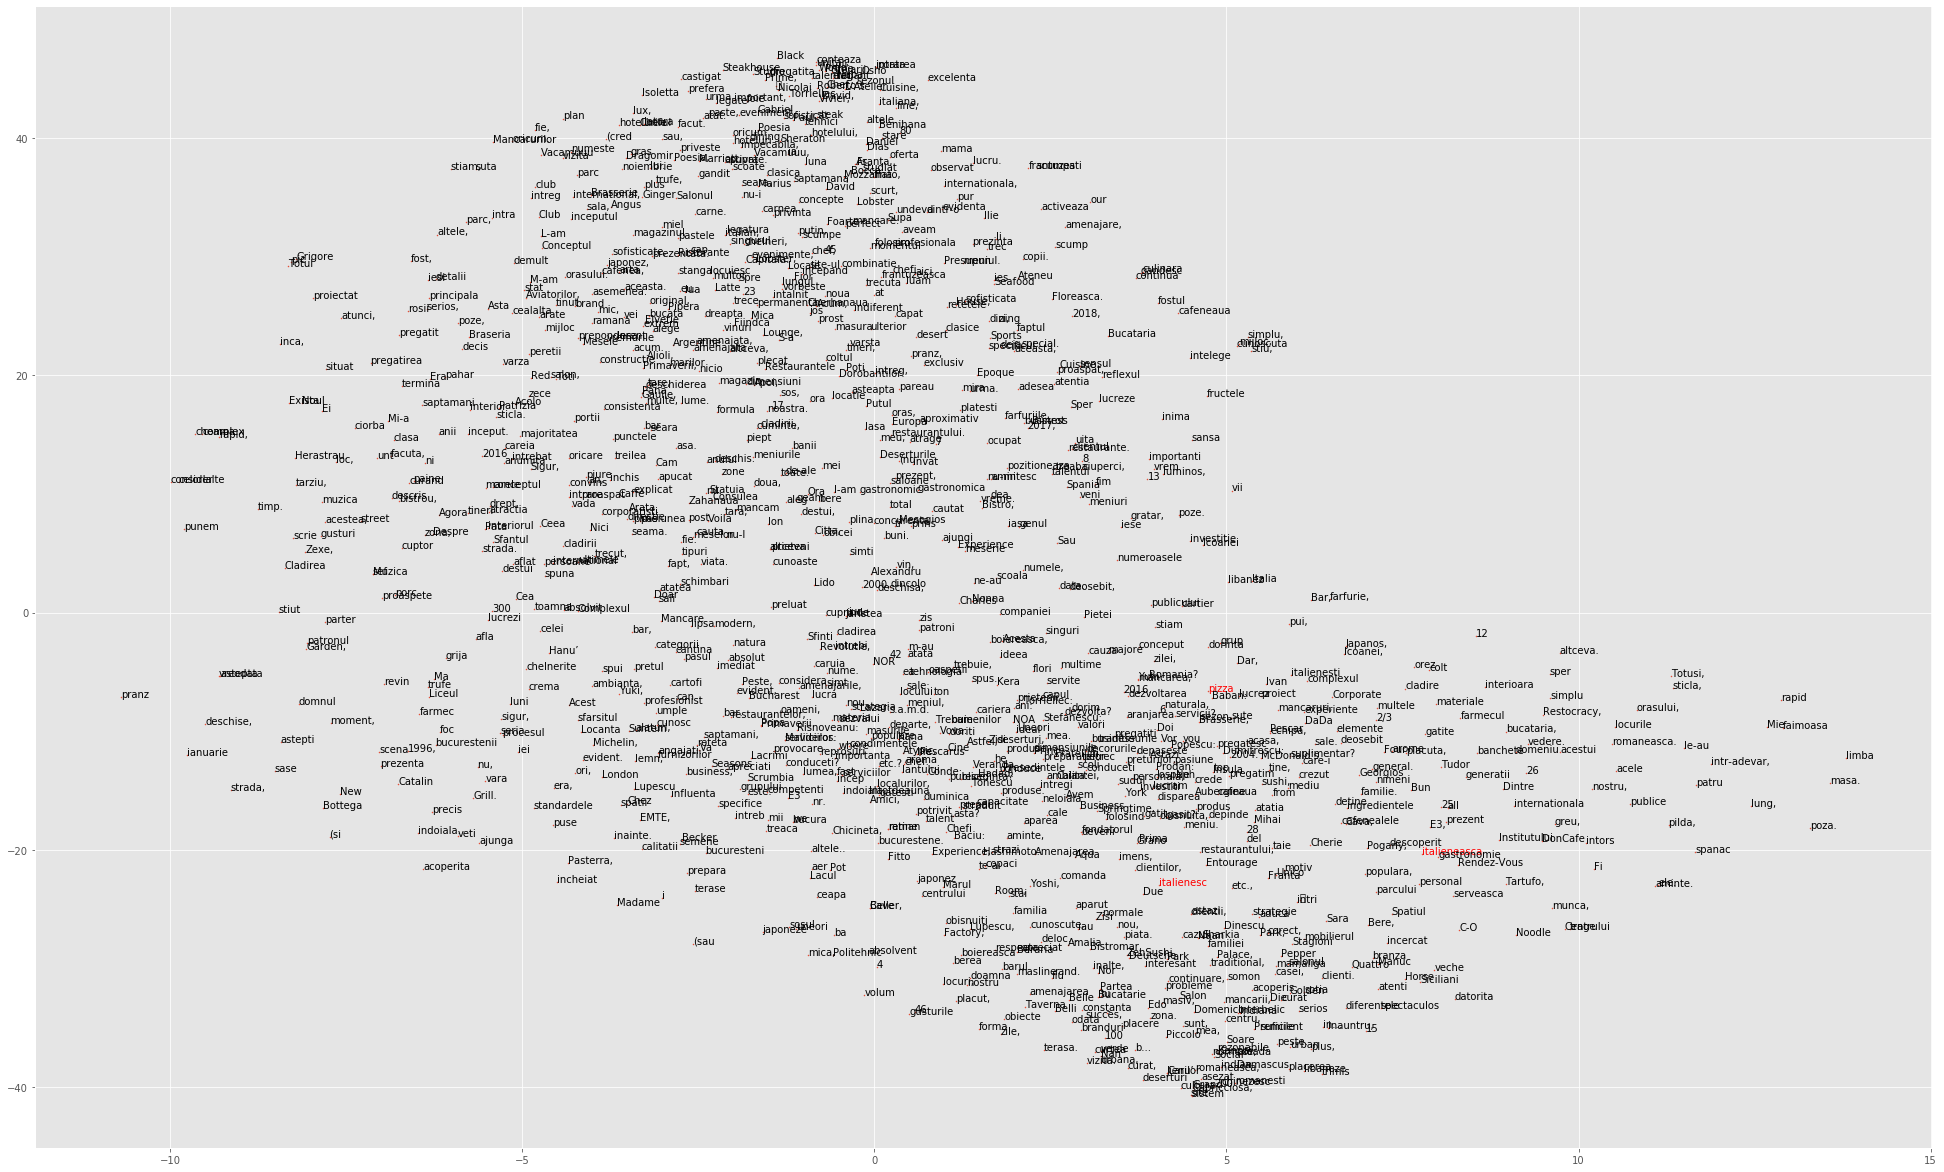

In [134]:
lbls = explain_embed_layer(
    embed_layer=embedding_projection,
    dct_index2label=i2w,
    start_end=(1100,2300),
    highlight_words=['pizza','italienesc','italieneasca']
)


In [148]:
tf_inp2 = tf.keras.layers.Input((500,), name='doc_input2')
embedding_projection2 = tf.keras.layers.Embedding(len(w2i), 100, name='word_embeds2')
tf_x_after_embeds = embedding_projection2(tf_inp2)
rnn_layer = tf.keras.layers.GRU(128)
tf_x_after_rnn = rnn_layer(tf_x_after_embeds)
print(tf_x_after_embeds)
print(tf_x_after_rnn)

Tensor("word_embeds2_2/Identity:0", shape=(None, 500, 100), dtype=float32)
Tensor("gru_2/Identity:0", shape=(None, 128), dtype=float32)


In [149]:
tf_out2 = tf.keras.layers.Dense(1)(tf_x_after_rnn)

model2 = tf.keras.models.Model(tf_inp2, tf_out2, name='more_advanced')
model2.compile(loss='mae', optimizer='adam')
model2.summary()

Model: "more_advanced"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
doc_input2 (InputLayer)      [(None, 500)]             0         
_________________________________________________________________
word_embeds2 (Embedding)     (None, 500, 100)          2200000   
_________________________________________________________________
gru_2 (GRU)                  (None, 128)               88320     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 2,288,449
Trainable params: 2,288,449
Non-trainable params: 0
_________________________________________________________________


Found pizza at [-0.04 -2.22]
Found italieneasca at [-1.55  6.6 ]
Found italienesc at [ 6.42 17.62]


C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56898 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 128578 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56897 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 128577 missing from current font.
  font.load_char(ord(s), flags=flags)


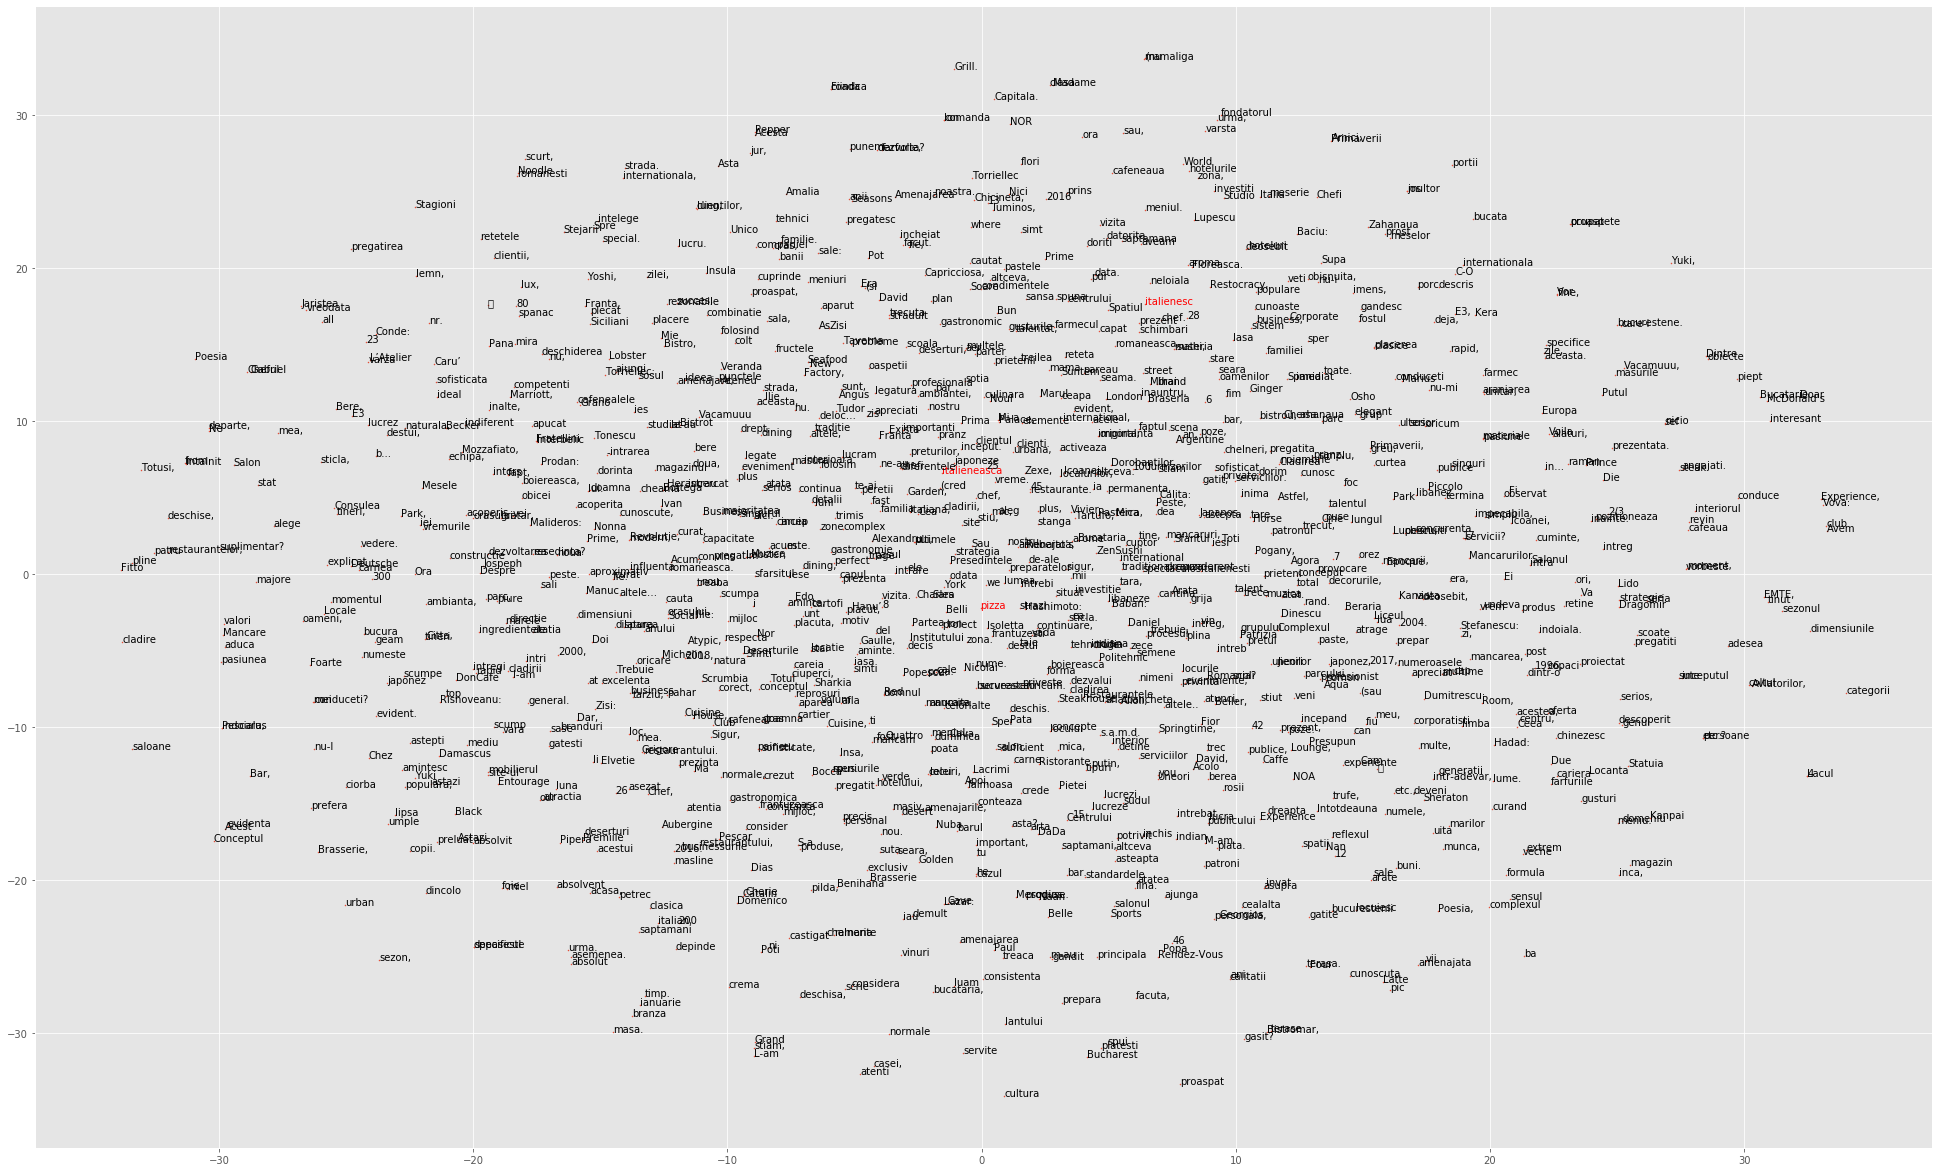

In [150]:
lbls = explain_embed_layer(
    embed_layer=embedding_projection2,
    dct_index2label=i2w,
    start_end=(1100,2300),
    highlight_words=['pizza','italienesc','italieneasca']
)


Train on 180 samples, validate on 20 samples
Epoch 1/160
180/180 [==============================] - 3s 14ms/sample - loss: 144.4984 - val_loss: 141.5711
Epoch 2/160
180/180 [==============================] - 0s 2ms/sample - loss: 144.0588 - val_loss: 140.5289
Epoch 3/160
180/180 [==============================] - 0s 2ms/sample - loss: 141.1461 - val_loss: 131.3927
Epoch 4/160
180/180 [==============================] - 0s 2ms/sample - loss: 132.1044 - val_loss: 127.3605
Epoch 5/160
180/180 [==============================] - 0s 2ms/sample - loss: 129.3924 - val_loss: 125.8117
Epoch 6/160
180/180 [==============================] - 0s 2ms/sample - loss: 128.0367 - val_loss: 124.6531
Epoch 7/160
180/180 [==============================] - 0s 2ms/sample - loss: 126.9317 - val_loss: 123.6119
Epoch 8/160
180/180 [==============================] - 0s 2ms/sample - loss: 125.9112 - val_loss: 122.6125
Epoch 9/160
180/180 [==============================] - 0s 2ms/sample - loss: 124.9173 - val_loss: 

180/180 [==============================] - 0s 1ms/sample - loss: 69.3730 - val_loss: 66.5775
Epoch 78/160
180/180 [==============================] - 0s 1ms/sample - loss: 68.6110 - val_loss: 65.8791
Epoch 79/160
180/180 [==============================] - 0s 1ms/sample - loss: 67.8568 - val_loss: 65.2256
Epoch 80/160
180/180 [==============================] - 0s 1ms/sample - loss: 67.0932 - val_loss: 64.6064
Epoch 81/160
180/180 [==============================] - 0s 1ms/sample - loss: 66.3358 - val_loss: 63.9862
Epoch 82/160
180/180 [==============================] - 0s 2ms/sample - loss: 65.5742 - val_loss: 63.3667
Epoch 83/160
180/180 [==============================] - 0s 2ms/sample - loss: 64.8169 - val_loss: 62.7489
Epoch 84/160
180/180 [==============================] - 0s 2ms/sample - loss: 64.0789 - val_loss: 62.1294
Epoch 85/160
180/180 [==============================] - 0s 1ms/sample - loss: 63.3255 - val_loss: 61.5374
Epoch 86/160
180/180 [==============================] - 0s 

Epoch 154/160
180/180 [==============================] - 0s 1ms/sample - loss: 36.8827 - val_loss: 44.8000
Epoch 155/160
180/180 [==============================] - 0s 1ms/sample - loss: 36.7996 - val_loss: 44.8000
Epoch 156/160
180/180 [==============================] - 0s 2ms/sample - loss: 36.7154 - val_loss: 44.8000
Epoch 157/160
180/180 [==============================] - 0s 1ms/sample - loss: 36.6320 - val_loss: 44.8000
Epoch 158/160
180/180 [==============================] - 0s 2ms/sample - loss: 36.5692 - val_loss: 44.8000
Epoch 159/160
180/180 [==============================] - 0s 2ms/sample - loss: 36.4921 - val_loss: 44.8000
Epoch 160/160
180/180 [==============================] - 0s 1ms/sample - loss: 36.4147 - val_loss: 44.8000


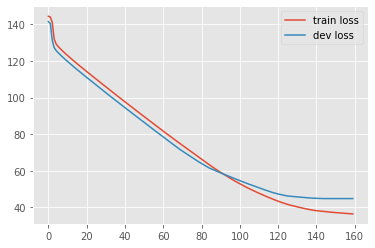

In [151]:
EPOCHS2 = 160
hist2 = model2.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_dev, y_dev),
    epochs=EPOCHS2
)

htrn2 = hist2.history['loss']
hdev2 = hist2.history['val_loss']
n_ep2 = len(htrn2)
plt.figure()
plt.plot(np.arange(n_ep2), htrn2, label='train loss')
plt.plot(np.arange(n_ep2), hdev2, label='dev loss')
plt.legend()
plt.show()

In [152]:
y_pred = model.predict(x_dev)

df_res = pd.DataFrame(
    dict(
        Reality=y_dev,
        Predictions=y_pred.ravel()
    )
)
df_res

,Reality,Predictions
0,77,131.5499
1,104,123.9204
2,259,140.1592
3,82,115.8297
4,106,131.1057
5,208,155.8414
6,117,135.9081
7,82,124.6419
8,189,145.0860
9,130,145.2666


Found pizza at [15.91 21.41]
Found italieneasca at [13.33 19.08]
Found italienesc at [16.4  27.73]


C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56898 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 128578 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56897 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\envs\nlu\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 128577 missing from current font.
  font.load_char(ord(s), flags=flags)


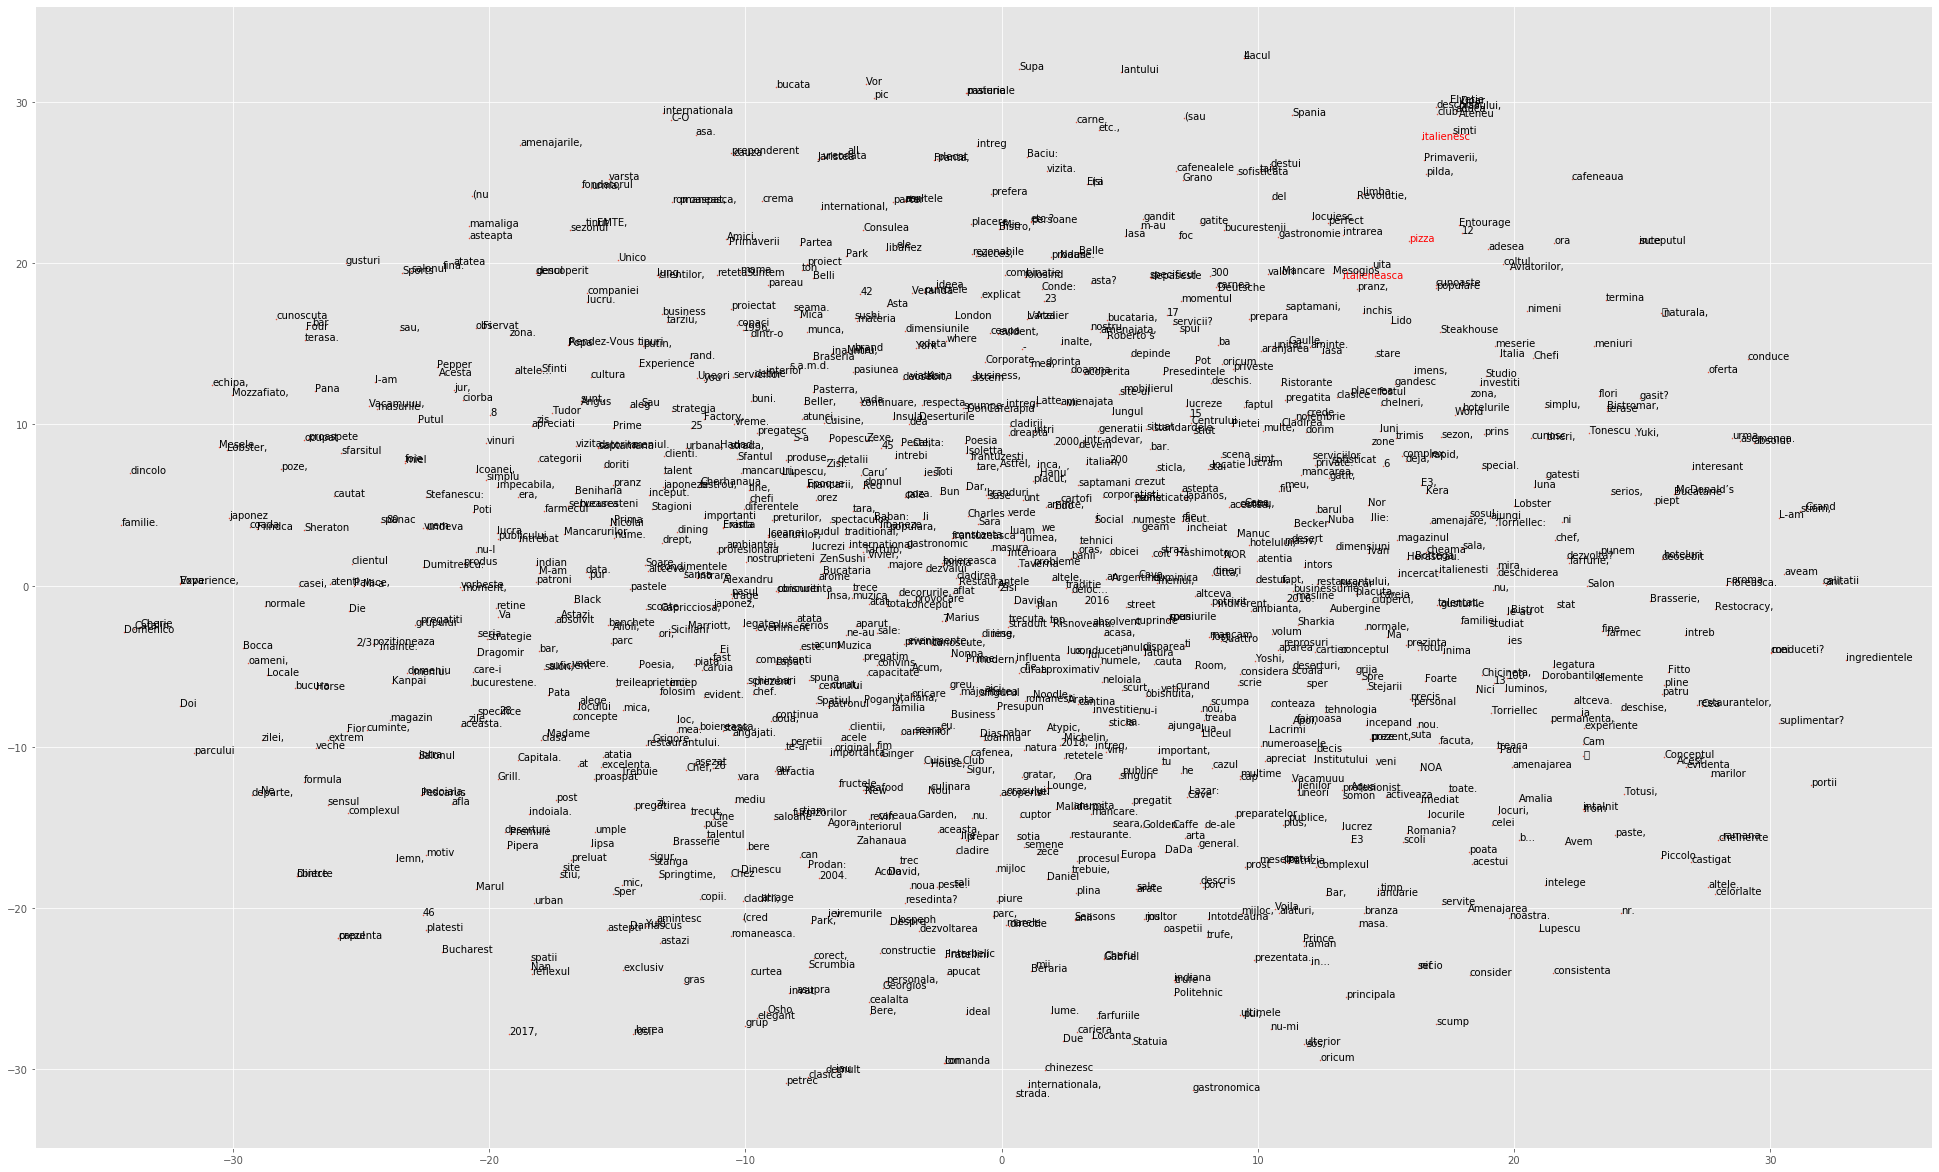

In [153]:
lbls = explain_embed_layer(
    embed_layer=embedding_projection2,
    dct_index2label=i2w,
    start_end=(1100,2300),
    highlight_words=['pizza','italienesc','italieneasca']
)


## Homework

1. replace the RNN layer with a simple average layer of the 500 vectors
2. train / evaluate / plot embeddings
3. choose any model (initial, RNN(GRU), average embeddings) and use min-max scaled targets
4. train / evaluate / plot embeddings
5. add another more complex model with min-max scaled targets
6. train / evaluate / plot embeddings using your model and the min-max scaled targets